## Code description

This code stacks images of Jupiter and the Crab nebula.

## Begin code

## JUPITER

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.wcs import WCS
from astropy.time import Time
from astropy.coordinates import SkyCoord
from collections import defaultdict
import datetime
from utils import *
from astropy.io import ascii

In [ ]:
'''jcoords = np.loadtxt("../data/Jupiter-ScWs.txt", delimiter=",", skiprows=1, usecols=(4, 5))
jupiter_ra = jcoords[:, 0]
jupiter_dec = jcoords[:, 1]

jdates = np.loadtxt("../data/Jupiter-ScWs.txt", delimiter=",", skiprows=1, usecols=(2,), dtype=str)
jdates = [Time(jd, format="mjd").datetime for jd in jdates]'''

In [2]:
jupiter_table = ascii.read('../data/jupiter_table.dat')

jupiter_ra = jupiter_table['jupiter_ra'] # ICRS
jupiter_dec = jupiter_table['jupiter_dec']

jdates = jupiter_table['start_date'] # MJD
jdates = [Time(jd, format="mjd").datetime for jd in jdates]

Total stack (over every ScW)

In [9]:
dir = "../data/Jupiter/15-30keV/Images"
#dir = "../data/JupiterIMG_FITS_30_60"
#dir = "../data/JupiterIMG_FITS_3_15"

s_var = None
s_flu = None
total_max_isgri_exp = 0

body_lim = {}

body_name = 'Jupiter'

for scw in np.sort(os.listdir(dir)):
    if scw.endswith(".fits"):

        scw_id = scw[:16]
        
        f = fits.open(os.path.join(dir, scw))

        sig = [e for e in f if e.header.get('IMATYPE', None) == "SIGNIFICANCE"][0]
        var = [e for e in f if e.header.get('IMATYPE', None) == "VARIANCE"][0]
        flu = [e for e in f if e.header.get('IMATYPE', None) == "INTENSITY"][0]
        expo = [e for e in f if e.header.get('IMATYPE', None) == "EXPOSURE"][0]

        wcs = WCS(sig.header)

        date_obs = Time(sig.header['DATE-OBS']).datetime

        # Find closest Jupiter position in time
        closest_idx = np.argmin(np.abs([jdates[i] - date_obs for i in range(len(jdates))]))
        j_ra = jupiter_ra[closest_idx]
        j_dec = jupiter_dec[closest_idx]

        try:
            body_i, body_j = [
            int(i) for i in 
            wcs.world_to_pixel(SkyCoord(j_ra, j_dec, unit="deg"))
            ]
        except Exception as e:
            print(f"Coordinate transform failed: {e}")
            continue

        plot_span = 20
        detection_span = 20

        if False:
            plt.figure(figsize=(4,4))
            plt.imshow(
                #sig.data
                sig.data[body_i-plot_span:body_i+plot_span, body_j-plot_span:body_j+plot_span]
            )

        if False:
            plt.scatter(
                body_i,
                body_j,
                c='r',
                marker='o',
                s=200,
                alpha=0.2
            )

            plt.clim([0,6])

        f = flu.data[body_i-detection_span:body_i+detection_span, body_j-detection_span:body_j+detection_span]
        v = var.data[body_i-detection_span:body_i+detection_span, body_j-detection_span:body_j+detection_span]
        ex = expo.data[body_i-detection_span:body_i+detection_span, body_j-detection_span:body_j+detection_span]

        try:
            if s_var is None:
                s_var = v.copy()
                s_flu = f.copy()
                s_expo = ex.copy()
            else:
                m = ~np.isnan(v)
                m &= v > 0
                
                s_flu[m] = (f[m]/v[m] + s_flu[m]/s_var[m])/(1/v[m] + 1/s_var[m])
                s_var[m] = 1/(1/v[m] + 1/s_var[m])
                s_expo[m] += ex[m]
                total_max_isgri_exp += np.nanmax(expo.data)
        except:
            print("fail to read!")
            continue
            
    
        body_lim[scw] = dict(
            ic = np.nanmean(v**0.5), 
            ic_std = np.nanstd(f), 
        )

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
Set MJD-OBS to 54559.124931 from DATE-OBS.
Set MJD-END to 54559.166273 from DATE-END'. [astropy.wcs.wcs]
Set MJD-OBS to 54559.167616 from DATE-OBS.
Set MJD-END to 54559.208958 from DATE-END'. [astropy.wcs.wcs]
Set MJD-OBS to 54559.253125 from DATE-OBS.
Set MJD-END to 54559.294468 from DATE-END'. [astropy.wcs.wcs]
Set MJD-OBS to 54559.295810 from DATE-OBS.
Set MJD-END to 54559.337153 from DATE-END'. [astropy.wcs.wcs]
Set MJD-OBS to 54559.338495 from DATE-OBS.
Set MJD-END to 54559.379838 from DATE-END'. [astropy.wcs.wcs]
Set MJD-OBS to 54559.381169 from DATE-OBS.
Set MJD-END to 54559.422523 from DATE-END'. [astropy.wcs.wcs]
Set MJD-OBS to 54559.466539 from DATE-OBS.
Set MJD-END to 54559.507894 from DATE-END'. [astropy.wcs.wcs]
Set MJD-OBS to 54559.552037 from DATE-OBS.
Set MJD-END to 54559.593380 from DATE-END'. [astropy.wcs.wcs]
Set MJD-OBS to 54559.594722 from DATE-OBS.
Set MJD-END to 54559.636065 from DATE-END'. [astr

fail to read!


Set MJD-OBS to 58755.403229 from DATE-OBS.
Set MJD-END to 58755.426377 from DATE-END'. [astropy.wcs.wcs]
Set MJD-OBS to 58755.427720 from DATE-OBS.
Set MJD-END to 58755.450868 from DATE-END'. [astropy.wcs.wcs]
Set MJD-OBS to 58755.568333 from DATE-OBS.
Set MJD-END to 58755.613414 from DATE-END'. [astropy.wcs.wcs]
Set MJD-OBS to 58755.614745 from DATE-OBS.
Set MJD-END to 58755.637894 from DATE-END'. [astropy.wcs.wcs]
Set MJD-OBS to 58755.639421 from DATE-OBS.
Set MJD-END to 58755.662581 from DATE-END'. [astropy.wcs.wcs]
Set MJD-OBS to 58755.664097 from DATE-OBS.
Set MJD-END to 58755.687245 from DATE-END'. [astropy.wcs.wcs]
Set MJD-OBS to 58755.688588 from DATE-OBS.
Set MJD-END to 58755.711736 from DATE-END'. [astropy.wcs.wcs]
Set MJD-OBS to 58781.030093 from DATE-OBS.
Set MJD-END to 58781.053970 from DATE-END'. [astropy.wcs.wcs]
Set MJD-OBS to 58781.055602 from DATE-OBS.
Set MJD-END to 58781.078657 from DATE-END'. [astropy.wcs.wcs]
Set MJD-OBS to 58781.079988 from DATE-OBS.
Set MJD-END 

Plotting

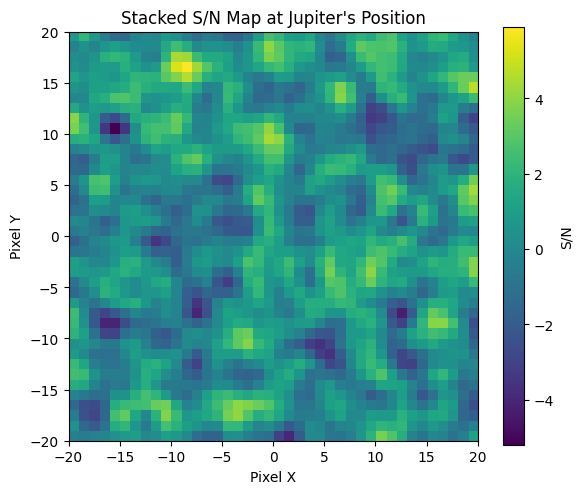

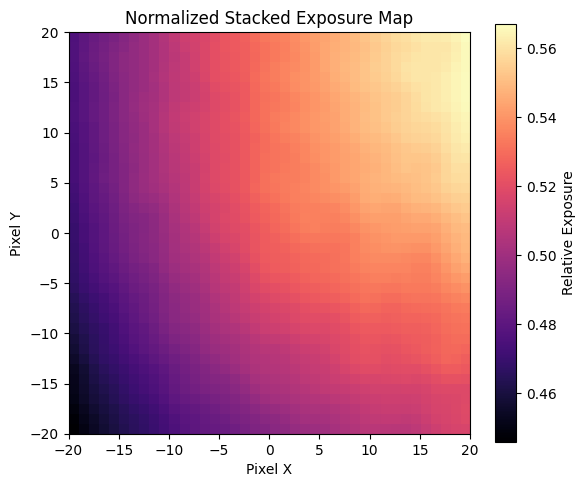

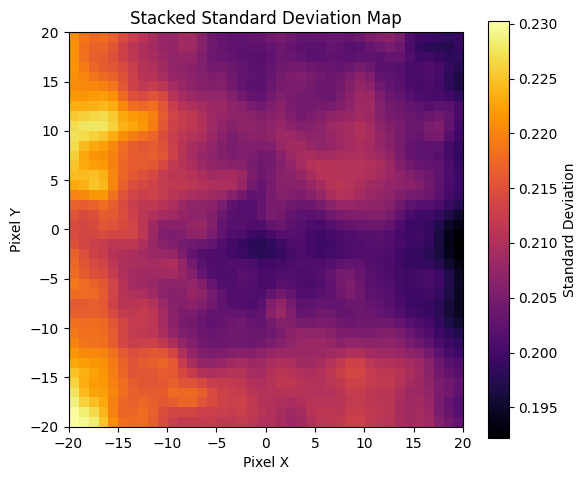

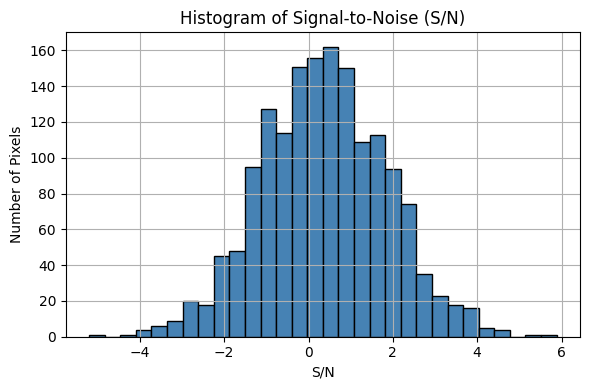

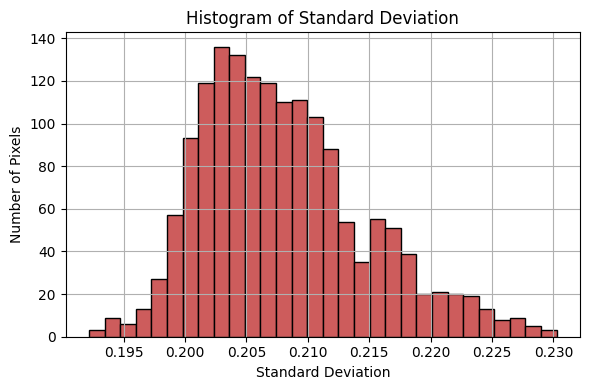

In [10]:
extent = [-detection_span, detection_span, -detection_span, detection_span]

# Signal-to-noise (S/N) map
plt.figure(figsize=(6, 5))
plt.imshow(s_flu / np.sqrt(s_var), origin='lower', cmap='viridis', extent=extent)
plt.title("Stacked S/N Map at Jupiter's Position")
plt.xlabel("Pixel X")
plt.ylabel("Pixel Y")
cbar = plt.colorbar()
cbar.set_label("S/N")
plt.tight_layout()

# Effective exposure map (normalized)
plt.figure(figsize=(6, 5))
plt.imshow(s_expo / total_max_isgri_exp, origin='lower', cmap='magma', extent=extent)
plt.title("Normalized Stacked Exposure Map")
plt.xlabel("Pixel X")
plt.ylabel("Pixel Y")
cbar = plt.colorbar()
cbar.set_label("Relative Exposure")
plt.tight_layout()

# Square root of the variance map
plt.figure(figsize=(6, 5))
plt.imshow(np.sqrt(s_var), origin='lower', cmap='inferno', extent=extent)
plt.title("Stacked Standard Deviation Map")
plt.xlabel("Pixel X")
plt.ylabel("Pixel Y")
cbar = plt.colorbar()
cbar.set_label("Standard Deviation")
plt.tight_layout()

# Histogram of S/N
plt.figure(figsize=(6, 4))
plt.hist((s_flu / np.sqrt(s_var)).flatten(), bins=30, color='steelblue', edgecolor='black')
plt.title("Histogram of Signal-to-Noise (S/N)")
plt.xlabel("S/N")
plt.ylabel("Number of Pixels")
plt.grid(True)
plt.tight_layout()

# Histogram of √variance
plt.figure(figsize=(6, 4))
plt.hist(np.sqrt(s_var).flatten(), bins=30, color='indianred', edgecolor='black')
plt.title("Histogram of Standard Deviation")
plt.xlabel("Standard Deviation")
plt.ylabel("Number of Pixels")
plt.grid(True)
plt.tight_layout()

Monthly stack

In [11]:
dir = "../data/Jupiter/15-30keV/Images"

detection_span = 20
extent = [-detection_span, detection_span, -detection_span, detection_span]

monthly_stack = defaultdict(lambda: {
    's_flu': None,
    's_var': None,
    's_expo': None,
    'count': 0
})

body_name = 'Jupiter'

for scw in np.sort(os.listdir(dir)):
    if not scw.endswith(".fits"):
        continue

    try:
        f = fits.open(os.path.join(dir, scw))
        sig = [e for e in f if e.header.get('IMATYPE') == "SIGNIFICANCE"][0]
        var = [e for e in f if e.header.get('IMATYPE') == "VARIANCE"][0]
        flu = [e for e in f if e.header.get('IMATYPE') == "INTENSITY"][0]
        expo = [e for e in f if e.header.get('IMATYPE') == "EXPOSURE"][0]

        wcs = WCS(sig.header)
        date_obs = Time(sig.header['DATE-OBS']).datetime
        key = (date_obs.year, date_obs.month)
        
        # Find Jupiter position closest in time
        closest_idx = np.argmin(np.abs([jdates[i] - date_obs for i in range(len(jdates))]))
        j_ra = jupiter_ra[closest_idx]
        j_dec = jupiter_dec[closest_idx]
        coord = SkyCoord(j_ra, j_dec, unit="deg")
        body_i, body_j = [int(i) for i in wcs.world_to_pixel(coord)]

        # Crop around Jupiter
        f_crop = flu.data[body_i-detection_span:body_i+detection_span, body_j-detection_span:body_j+detection_span]
        v_crop = var.data[body_i-detection_span:body_i+detection_span, body_j-detection_span:body_j+detection_span]
        e_crop = expo.data[body_i-detection_span:body_i+detection_span, body_j-detection_span:body_j+detection_span]
        
        # Check if cropped region has the right shape
        if f_crop.shape != (2 * detection_span, 2 * detection_span):
            print(f"Skipping {scw} due to crop shape: {f_crop.shape}")
            continue

        # Stack
        stack = monthly_stack[key]
        if stack['s_var'] is None:
            stack['s_flu'] = f_crop.copy()
            stack['s_var'] = v_crop.copy()
            stack['s_expo'] = e_crop.copy()
        else:
            m = ~np.isnan(v_crop)
            m &= v_crop > 0

            stack['s_flu'][m] = (f_crop[m]/v_crop[m] + stack['s_flu'][m]/stack['s_var'][m]) / (1/v_crop[m] + 1/stack['s_var'][m])
            stack['s_var'][m] = 1/(1/v_crop[m] + 1/stack['s_var'][m])
            stack['s_expo'][m] += e_crop[m]

        stack['count'] += 1

    except Exception as e:
        print(f"Failed on {scw}: {e}")
        continue

Skipping 074000490010.001mosaic.fits due to crop shape: (0, 40)
Skipping 074000500010.001mosaic.fits due to crop shape: (0, 40)
Skipping 074000510010.001mosaic.fits due to crop shape: (13, 40)
Skipping 214200550010.001mosaic.fits due to crop shape: (0, 40)
Skipping 215200070010.001mosaic.fits due to crop shape: (0, 40)
Skipping 221300170010.001mosaic.fits due to crop shape: (0, 40)
Skipping 236600210010.001mosaic.fits due to crop shape: (0, 40)
Skipping 236900380010.001mosaic.fits due to crop shape: (0, 40)
Skipping 236900390010.001mosaic.fits due to crop shape: (0, 40)
Skipping 237000480010.001mosaic.fits due to crop shape: (0, 40)
Skipping 237200410010.001mosaic.fits due to crop shape: (0, 40)


Light Curve

In [13]:
monthly_dates = []
monthly_sn = []

for (year, month), stack in sorted(monthly_stack.items()):
    if stack['s_flu'] is None or stack['s_var'] is None:
        continue
    if stack['s_flu'].shape != (2 * detection_span, 2 * detection_span):
        continue

    sn_map = stack['s_flu'] / np.sqrt(stack['s_var'])
    center_sn = sn_map[detection_span, detection_span]

    monthly_dates.append(datetime(year, month, 15))  # mid-month
    monthly_sn.append(center_sn)


/tmp/ipykernel_76690/750016879.py:10: RuntimeWarning: invalid value encountered in divide
  sn_map = stack['s_flu'] / np.sqrt(stack['s_var'])


Plotting

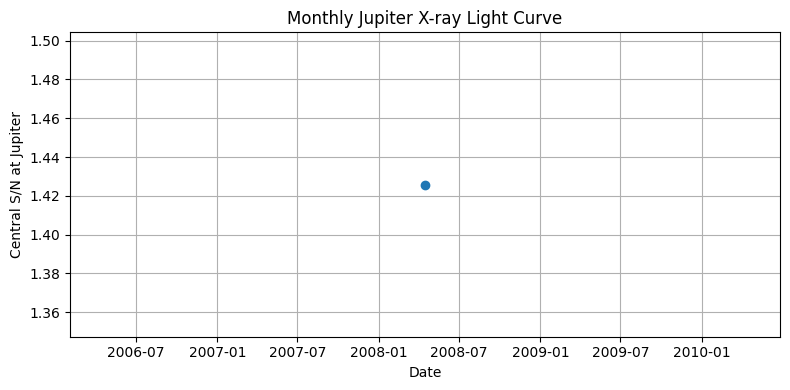

In [14]:
plt.figure(figsize=(8, 4))
plt.plot(monthly_dates, monthly_sn, marker='o')
plt.xlabel("Date")
plt.ylabel("Central S/N at Jupiter")
plt.title("Monthly Jupiter X-ray Light Curve")
plt.grid(True)
plt.tight_layout()

## CRAB

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.wcs import WCS
from astropy.time import Time
from astropy.coordinates import SkyCoord
from collections import defaultdict
import datetime
from utils import *
from astropy.io import ascii

In [2]:
crab_coords = SkyCoord.from_name("Crab")
crab_ra = crab_coords.ra.deg
crab_dec = crab_coords.dec.deg

In [3]:
#dir = "../data/Crab/15-30keV/Images"
#dir = "../data/Crab/30-60keV/Images"
dir = "../data/Crab/3-15keV/Images"

s_var = None
s_flu = None
s_expo = None
total_max_isgri_exp = 0

body_lim = {}

body_name = 'Crab'

for scw in np.sort(os.listdir(dir)):
    if scw.endswith(".fits"):

        try:

            scw_id = scw[:16]
            
            f = fits.open(os.path.join(dir, scw))
            if dir == "../data/Crab/3-15keV/Images":
                flu = [e for e in f if e.header.get('IMATYPE', None) == "RECONSTRUCTED"][0]
            else:
                flu = [e for e in f if e.header.get('IMATYPE', None) == "INTENSITY"][0]
            sig = [e for e in f if e.header.get('IMATYPE', None) == "SIGNIFICANCE"][0]
            var = [e for e in f if e.header.get('IMATYPE', None) == "VARIANCE"][0]
            expo = [e for e in f if e.header.get('IMATYPE', None) == "EXPOSURE"][0]

            wcs = WCS(sig.header)

            try:
                body_i, body_j = [
                    int(i) for i in 
                    wcs.world_to_pixel(SkyCoord(crab_ra, crab_dec, unit="deg"))
                ]
            except Exception as e:
                print(f"Coordinate transform failed: {e}")
                continue

            plot_span = 20
            detection_span = 20

            if False:
                plt.figure(figsize=(4,4))
                plt.imshow(
                    sig.data[body_i-plot_span:body_i+plot_span, body_j-plot_span:body_j+plot_span]
                )

            if False:
                plt.scatter(
                    body_i,
                    body_j,
                    c='r',
                    marker='o',
                    s=200,
                    alpha=0.2
                )
                plt.clim([0, 6])

            f = flu.data[body_i-detection_span:body_i+detection_span, body_j-detection_span:body_j+detection_span]
            v = var.data[body_i-detection_span:body_i+detection_span, body_j-detection_span:body_j+detection_span]
            ex = expo.data[body_i-detection_span:body_i+detection_span, body_j-detection_span:body_j+detection_span]

            # Check if cropped region has the right shape
            if f.shape != (2 * detection_span, 2 * detection_span):
                print(f"Skipping {scw} due to crop shape: {f.shape}")
                continue

            try:
                if s_var is None:
                    s_var = v.copy()
                    s_flu = f.copy()
                    s_expo = ex.copy()
                else:
                    m = ~np.isnan(v)
                    m &= v > 0

                    s_flu[m] = (f[m]/v[m] + s_flu[m]/s_var[m])/(1/v[m] + 1/s_var[m])
                    s_var[m] = 1/(1/v[m] + 1/s_var[m])
                    s_expo[m] += ex[m]
                    total_max_isgri_exp += np.nanmax(expo.data)
            except Exception as e:
                print(f"Failed to process SCW {scw_id}: {e}")
                continue

            body_lim[scw] = dict(
                ic=np.nanmean(np.sqrt(v)), 
                ic_std=np.nanstd(f),
            )
        except Exception as e:
            print(f"Failed to read {scw}: {e}")
            continue

FileNotFoundError: [Errno 2] No such file or directory: '../data/Crab/3-15keV/Images'

/home/hthums/micromamba/envs/jupiter_xray/lib/python3.9/site-packages/matplotlib/axes/_axes.py:6834: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
/home/hthums/micromamba/envs/jupiter_xray/lib/python3.9/site-packages/matplotlib/axes/_axes.py:6835: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))


ValueError: autodetected range of [nan, nan] is not finite

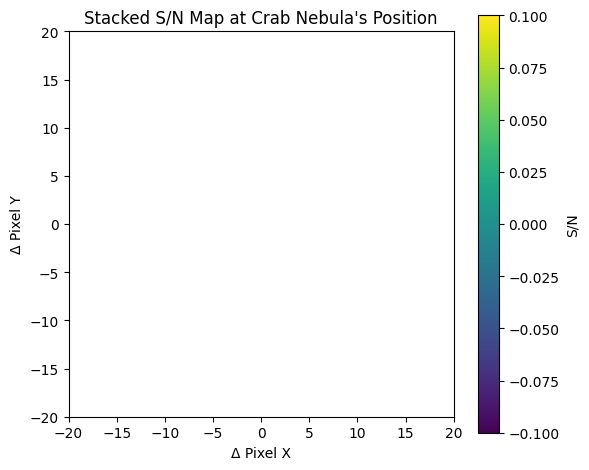

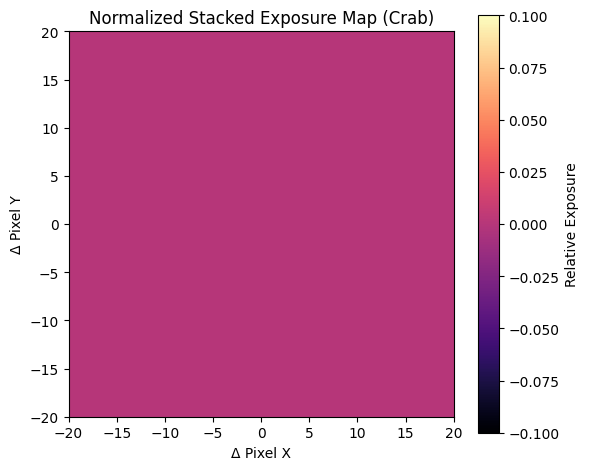

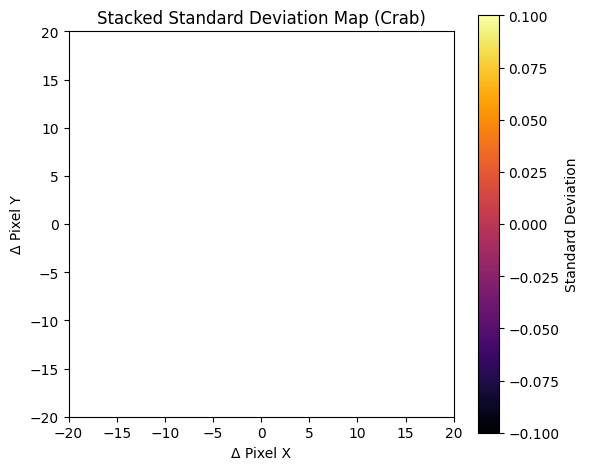

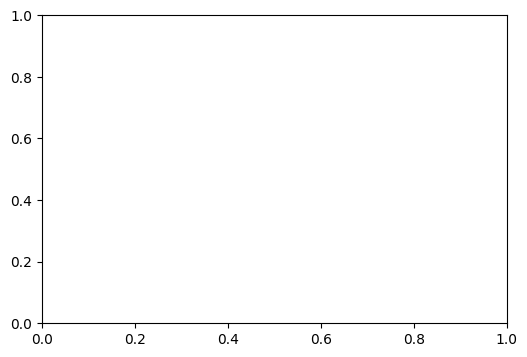

In [16]:
extent = [-detection_span, detection_span, -detection_span, detection_span]

# Signal-to-noise (S/N) map
plt.figure(figsize=(6, 5))
plt.imshow(s_flu / np.sqrt(s_var), origin='lower', cmap='viridis', extent=extent)
plt.title("Stacked S/N Map at Crab Nebula's Position")
plt.xlabel("Δ Pixel X")
plt.ylabel("Δ Pixel Y")
cbar = plt.colorbar()
cbar.set_label("S/N")
plt.tight_layout()

# Effective exposure map (normalized)
plt.figure(figsize=(6, 5))
plt.imshow(s_expo / total_max_isgri_exp, origin='lower', cmap='magma', extent=extent)
plt.title("Normalized Stacked Exposure Map (Crab)")
plt.xlabel("Δ Pixel X")
plt.ylabel("Δ Pixel Y")
cbar = plt.colorbar()
cbar.set_label("Relative Exposure")
plt.tight_layout()

# Square root of the variance map
plt.figure(figsize=(6, 5))
plt.imshow(np.sqrt(s_var), origin='lower', cmap='inferno', extent=extent)
plt.title("Stacked Standard Deviation Map (Crab)")
plt.xlabel("Δ Pixel X")
plt.ylabel("Δ Pixel Y")
cbar = plt.colorbar()
cbar.set_label("Standard Deviation")
plt.tight_layout()

# Histogram of S/N
plt.figure(figsize=(6, 4))
plt.hist((s_flu / np.sqrt(s_var)).flatten(), bins=30, color='steelblue', edgecolor='black')
plt.title("Histogram of Signal-to-Noise (S/N) — Crab")
plt.xlabel("S/N")
plt.ylabel("Number of Pixels")
plt.grid(True)
plt.tight_layout()

# Histogram of √variance
plt.figure(figsize=(6, 4))
plt.hist(np.sqrt(s_var).flatten(), bins=30, color='indianred', edgecolor='black')
plt.title("Histogram of Standard Deviation — Crab")
plt.xlabel("Standard Deviation")
plt.ylabel("Number of Pixels")
plt.grid(True)
plt.tight_layout()
